Transformation to make the data "NORMALLY DISTRIBUTED" , 
we use Log for linear model , reciprocal ,sq , sqrt 

### function transformer and Power transformer do the same work to make the data normally distribuated.

In [81]:
import pandas as pd 
import numpy as np 


In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [83]:
df = pd.read_csv(r"c:\Users\Admin\Documents\DataSets\Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])

In [84]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [85]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [86]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [87]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [88]:
X=df.iloc[:,1:]

In [89]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [90]:
Y = df.iloc[:,0]

In [91]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [92]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size =0.2 ,random_state=42)

In [93]:
X_train.shape

(712, 2)

In [94]:
X_test.shape

(179, 2)

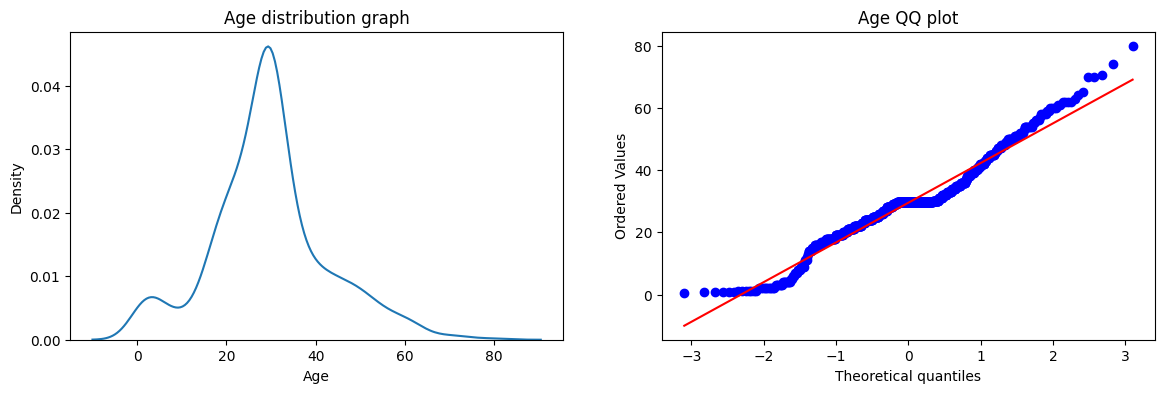

In [95]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title("Age distribution graph")

plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm",plot=plt)
plt.title("Age QQ plot")
plt.show()

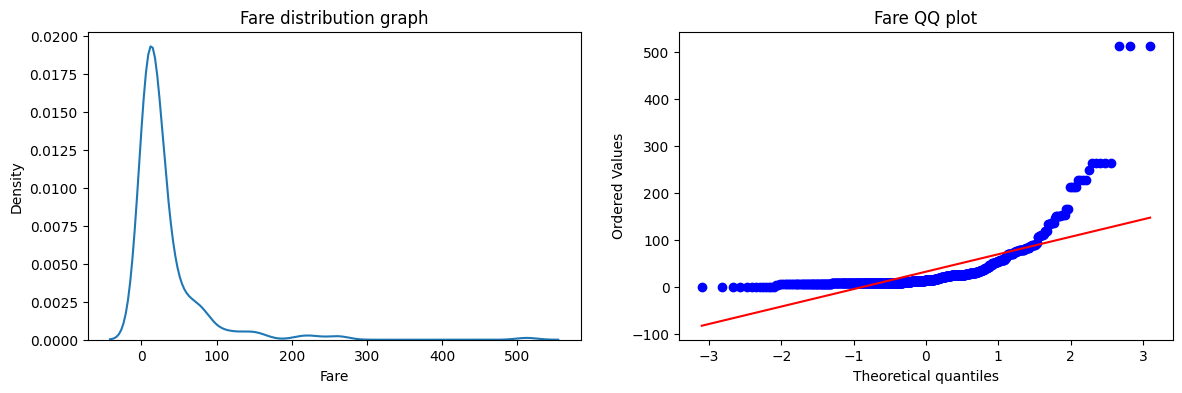

In [96]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title("Fare distribution graph")

plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm",plot=plt)
plt.title("Fare QQ plot")
plt.show()

In [97]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [98]:
model1.fit(X_train , Y_train)
model2.fit(X_train , Y_train)
y_pred = model1.predict(X_test)
y_pred1 = model2.predict(X_test)

print("Accuracy LR ",accuracy_score(Y_test , y_pred))
print("Accuracy DT ",accuracy_score(Y_test , y_pred1))


Accuracy LR  0.6480446927374302
Accuracy DT  0.6815642458100558


In [99]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed=trf.fit_transform(X_train) # for training 
X_test_transformed=trf.fit_transform(X_test) # for testing 

In [100]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

model1.fit(X_train_transformed , Y_train)
model2.fit(X_train_transformed , Y_train)

y_pred = model1.predict(X_test_transformed)
y_pred1 = model2.predict(X_test_transformed)

print("Accuracy LR ",accuracy_score(Y_test , y_pred)) # Here we can see the accuracy of the Linear model increase after the transformation of the col 
print("Accuracy DT ",accuracy_score(Y_test , y_pred1))


Accuracy LR  0.6815642458100558
Accuracy DT  0.659217877094972


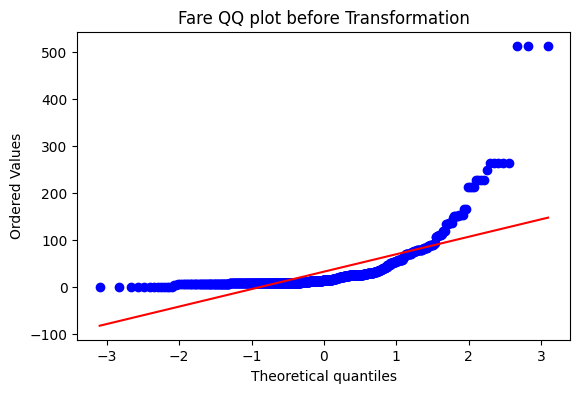

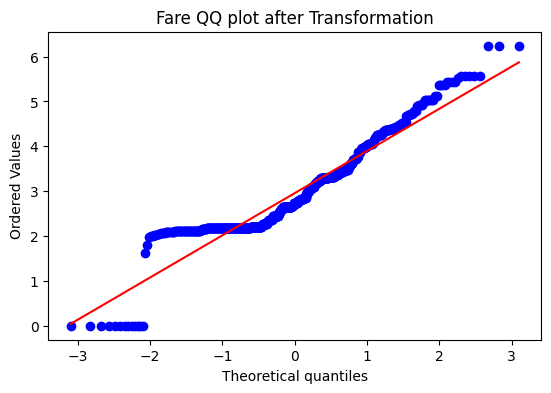

In [101]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm",plot=plt)
plt.title("Fare QQ plot before Transformation")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist="norm",plot=plt)
plt.title("Fare QQ plot after Transformation")
plt.show()

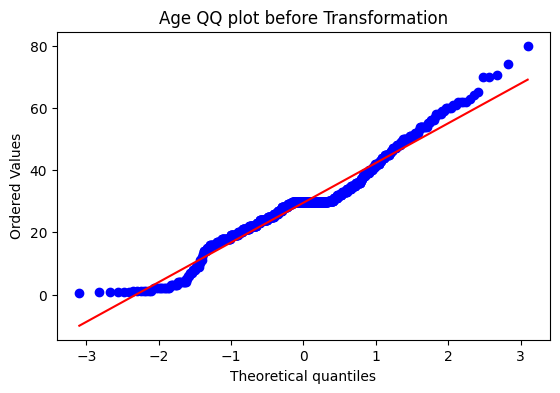

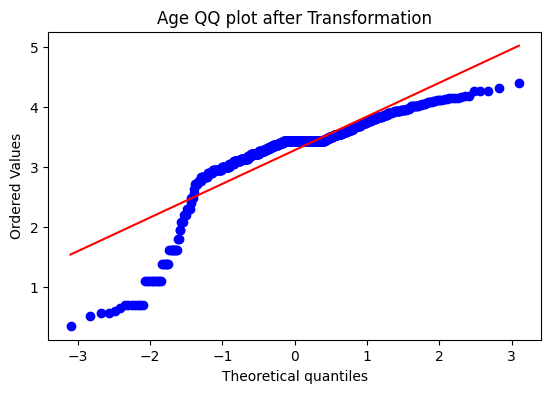

In [102]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm",plot=plt)
plt.title("Age QQ plot before Transformation")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist="norm",plot=plt)
plt.title("Age QQ plot after Transformation")
plt.show()

In [ ]:
tnf1 = ColumnTransformer([
    ('fare_tf1',FunctionTransformer(func=np.log1p),[1])   # log transformation 
],remainder='passthrough')


In [ ]:
X_train=X_train.values # x_train converts to numpy values 

In [107]:
X_train

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    ,  14.1083],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]])

In [108]:
X_train_transformed2=tnf1.fit_transform(X_train)
X_test_transformed2=tnf1.fit_transform(X_test)

In [109]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()


In [114]:
model1.fit(X_train_transformed2 , Y_train)
model2.fit(X_train_transformed2 , Y_train)
y_pred = model1.predict(X_test_transformed)
y_pred1 = model2.predict(X_test_transformed)

c:\Users\Admin\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Admin\Desktop\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [115]:
print("Accuracy LR ",accuracy_score(Y_test , y_pred)) # Here we can see the accuracy of the Linear model increase after the transformation of the col 
print("Accuracy DT ",accuracy_score(Y_test , y_pred1))

Accuracy LR  0.4022346368715084
Accuracy DT  0.4972067039106145


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

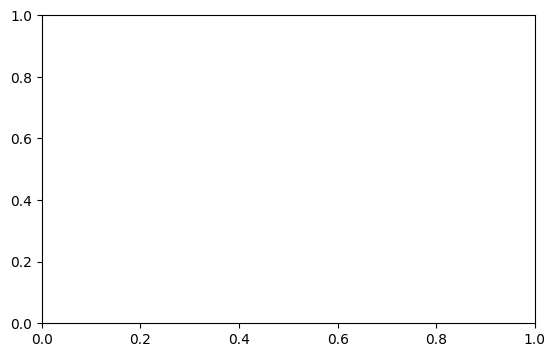

In [113]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm",plot=plt)
plt.title("Fare QQ plot before Transformation")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed2['Fare'] , dist="norm",plot=plt)
plt.title("Fare QQ plot after Transformation")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

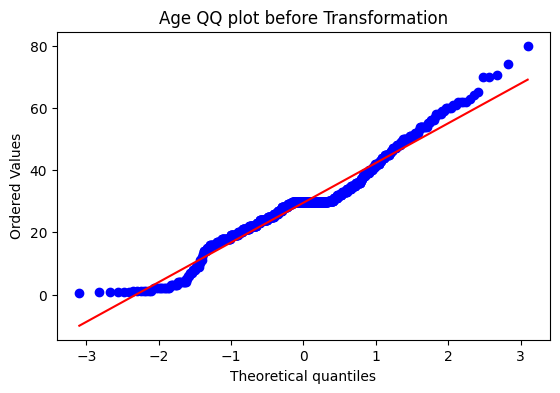

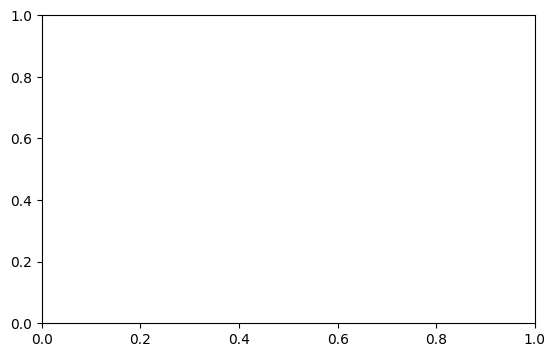

In [71]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm",plot=plt)
plt.title("Age QQ plot before Transformation")

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train_transformed2['Age'] , dist="norm",plot=plt)
plt.title("Age QQ plot after Transformation")
plt.show()